# NOTEBOOK

## Table des matières

* [1. Modélisation du problème algorithmique](#Modelisation)
    * [1.1 Reformulation du besoin](#reformulation)
    * [1.2 Définition mathématique du problème](#def_math)
    * [1.3 Etude de complexité du problème](#etude_complexite)
* [2. Modélisation algorithmique](#modelisation_algo)
    * [2.1. La description de l’algorithme utilisé (la métaheuristique choisie et la modélisation du problème selon le formalisme de cette métaheuristique)](#description_algo)
    * [2.2 Implémentation du modèle en Python](#implement_modele)
        * [2.2.1 Génération aléatoire des données](#generation_donnees)
* [3. Implémentation algorithme ACO](#implement_algo)
* [4. Analyse prédictive du trafic routier](#analyse_predictive)
* [5. Étude statistique](#etude_stat)
    * [5.1 Statistiques descriptives](#stat_descriptive)
        * [5.1.1 Statistiques du coût des routes](#stats_cout)
        * [5.1.2 Statistiques des demandes des clients](#stats_demandes)
    * [5.2 Etude des paramètres](#etude_param)
        * [5.2.1 Paramètres de l'instance du problème](#param_instance)
        * [5.2.2 Paramètres de l'algorithme](#param_algo)
* [6. Analyse des résultats](#analyse_result)
    * [6.1. Performance de l'algorithme](#perform_algo)
    * [6.2. Temps de convergence / nombre d'itérations](#temps_convergence)
* [7. Limites](#limites)
* [8. Conclusion](#conclusion)


## 1. Modélisation du problème algorithmique <a class="anchor" id="Modelisation"></a>

### 1.1 Reformulation du besoin <a class="anchor" id="reformulation"></a>

Notre entreprise CesiCDP a répondu à un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires formulé par l'ADEME.

L'objectif de cette réponse est de limiter les coûts économiques et environnementaux de déplacement de nos camions en remodélisant leurs tournées. Chaque tournée consiste à emprunter un réseau routier afin de lier entre elles un sous-ensemble de villes.

L'objectif est d'optimiser les tournées de telle manière à ce que la durée totale de celles-ci soit minimale.

Nos tournées devront prendre en compte le trafic routier selon les différentes tranches horaires. En plus de cela, nous tiendrons compte de la capacité tridimensionnelle de nos camions vis-à-vis de l'encombrement des objets.

Le problème de tournée s'apparente au problème du VRP (Vehicles Routing Problem). Néanmoins, étant donné que nous rajoutons une contrainte à celui-ci, à savoir la capacité des camions, le problème global s'apparente plutôt à la variante du problème qu'est le CVRP (Capacitated Vehicles Routing Problem), qui ajoute une contrainte de capacité aux camions. 
L'ajout de cette contrainte nous semble intuitive, car dans un cas concret, les camions comporteront tous une capacité de stockage.

### 1.2 Définition mathématique du problème <a class="anchor" id="def_math"></a>

En considérant $n$ le nombre de villes, $m$ le nombre de camion, $Q$ la capacité de ces camions, $q_i$ la demande du client $i$, et $c_{ij}$ le coût de l'arête entre les sommets $i$ et $j$ (temps de parcours).

Les variables de décision du problème sont $x_{ijk}$: 
$$
x_{ijk} = \left\{
    \begin{array}{ll}
        1 & \mbox{si } (i,j) \mbox{ est parcouru par le véhicule k}  \\
        0 & \mbox{sinon.}
    \end{array}
\right.
$$

Ainsi, en tant que problème d'optimisation, le problème s'écrit:

$$min\sum_{i=1}^{n} \sum_{j=1}^{n} c_{ij} \sum_{K=1}^{m} x_{ijk}$$

On cherche à minimiser cette fonction afin qu'elle soit la plus prôche possible de 0. Ce problème vise à minimiser la somme du coût des arêtes empruntées.

Le problème est sujet aux contraintes suivantes:

$$\sum_{i=1}^{n} \sum_{k=1}^{m} x_{ijk} = 1\quad\forall 1 \leq j \leq n$$

$$\sum_{j=1}^{n} \sum_{k=1}^{m} x_{ijk} = 1\quad\forall 1 \leq i \leq n$$

Ces contraintes nous imposent que chaque client soit desservi une et une seule fois. En effet on impose dans un premier temps que chaque sommet ne soit accédé que par un sommet, puis dans un second temps que chaque sommet n'accède qu'à un seul autre sommet.

$$\sum_{j=1}^{n} x_{0jk} = 1\quad\forall 1 \leq k \leq m $$

$$\sum_{i=1}^{n} x_{i0k} = 1\quad\forall 1 \leq k \leq m $$

Ces contraintes assurent que chaque tournée commence et se termine au dépôt. En effet, dans un premier temps, nous indiquons que tout camion doit accéder à un sommet depuis le sommet 0, et dans un second temps que tout camion doit pouvoir revenir depuis un sommet au sommet 0.

$$\sum_{i=1}^{n}\sum_{j=1}^{n}x_{ijk}q_i \leq Q\quad\forall 1 \leq k \leq m$$

Cette contrainte concerne la capacité des camions. En effet pour chaque camion, la somme des demandes des clients visités doit au maximum être égal à la capacité du camion.

$$x_{ijk} \in \{0,1\}\quad\forall 0 \leq i,j\leq n;\quad1 \leq k \leq m$$

Cette dernière contrainte est une contrainte de binarité. En effet, nous indiquons que $x_{ijk}$ ne peut être égal qu'à 0 ou 1 pour tout $i$ et $j$ compris entre 0 et le nombre de sommet et pour tout $k$ compris entre 1 et le nombre maximum de camion.

### 1.3 Etude de complexité du problème <a class="anchor" id="etude_complexite"></a>

Le problème de VRP étant la représentation de base de notre problème fait partie des 21 problèmes NP- complet de Karp. Ce sont 21 problèmes réputés difficiles de combinatoire et de théorie des graphes qui sont réductibles entre eux. 
C'est ce qu'a démontré Richard Karp en 1972 dans son article *Reducibility Among Combinatorial Problems*, de même que leur NP-complétude.

 

Aucun algorithme ne peut actuellement résoudre de façon exacte (dans un temps raisonable) ce problème, en effet il faudrait jusqu'à plusieurs siècles de calcul pour obtenir un résultat exact. 

La seule manière, très fastidieuse, pour trouver la solution optimale est de parcourir tous les chemins possibles. Pour n villes nous auront donc n! chemins possibles, ce qui correspond à une complexité asymptotique O(n!).
Pour 10 villes nous aurons donc 3.6.10^6 possibilités, 9.332622e+157 pour 100 villes or nous savons que notre problème concerne des milliers de villes, nous avons donc une complexité exponentielle.

 

Il nous faut trouver une solution dans des délais raisonnables. C'est pourquoi dans la suite nous n'allons pas chercher à trouver une solution exacte mais plutôt une solution approchée de celle-ci.

## 2. Modélisation algorithmique <a class="anchor" id="modelisation_algo"></a>

### 2.1. La description de l’algorithme utilisé (la métaheuristique choisie et la modélisation du problème selon le formalisme de cette métaheuristique) <a class="anchor" id="description_algo"></a>

Notre choix pour la méthode métaheuristique se tourne vers l'algorithme de colonie de fourmis (ACO). 
En effet les ACO sont plus performants dans les classes de grande taille,  garantissent  une  bonne  diversification  des  solutions proposées et un bon ratio de convergence. De plus les  ACO sont  fortement  recommandés  dans tous les cas  d’optimisation : moyenne à grandes instances, qualité de la solution  finale,  éviter  les  stagnations  et  les  convergences précoces. Ce qui permet d'avoir une qualité de solution optimale. 

Source: https://www.researchgate.net/publication/275966237_Comparaison_de_l%27optimisation_par_colonies_de_fourmis_et_des_Algorithmes_Genetiques_pour_la_resolution_du_probleme_du_voyageur_de_commerce

Son fonctionnement est le suivant :

1. Une fourmi parcourt plus ou moins au hasard l'environnement autour de son point de départ.

2. Si elle trouve de la nouriture, elle rentre plus ou moins directement à son point de départ, en laissant sur son chemin une piste de phéromones.

3. Ces phéromones sont attractives, les fourmis à proximités auront tendance a suivre ces phéromones.

4. Si deux chemins sont possibles pour atteindre leur but, la plus courte sera parcouru par plus de fourmis dans un même temps et sera donc renforcée par d'autres phéromones.

5. Les phéromones sont volatiles, la longue piste finira donc par disparaitre dans le temps, les fourmis auront donc déterminé la piste la plus courte.

Transposons donc ce fonctionnement dans notre cas : 


Nous utiliserons un ensemble de fourmis qui parcourra un ensemble de chemin parmi ceux possibles afin de déterminer une solution quasi optimale à notre problème.

Chaque fourmi va donc passer d'une ville à l'autre de la manière suivante : 

- elle ne peut visiter qu'une fois chaque ville
- si une ville est loin par rapport à une autre, elle a moins de chance d'être choisie
- plus le chemin entre deux villes a de phéromones, plus il a de chance d'être choisi
- Lorsque la fourmi a fini son chemin, elle le fait en sens inverse en y déposant des phéromones
- Chaque itération de notre algorithme fait disparaitre des phéromones.

### 2.2 Implémentation du modèle en Python  <a class="anchor" id="implement_modele"></a>

Voici les différentes structures que nous devrons mettre en place pour notre modélisation en Python : 

Pour modéliser notre problème nous devons générer : 

* Une matrice d'adjacence représentant le poids (trafic) entre chaque ville
* Un tableau représentant les trois dimensions de l'objet demandé par chaque ville
* Un tableau représentant les capacités de nos camions

Pour implémenter l'ACO, nous avons besoin de :

* Une matrice représentant les phéromones
* Fourmis virtuelles utilisées pour trouver le chemin le plus proche du chemin optimal

### 2.2.1 Génération aléatoire des données <a class="anchor" id="generation_donnees"></a>

Pour tester notre algorithme, nous avons besoin d'un jeu de données (Dataset). Le code ci-dessous nous permettra de le générer aléatoirement :

#### Import des modules

In [1]:
from statistics import mean
import matplotlib.pyplot as plt
import os
from datetime import datetime
from sklearn import linear_model
from itertools import chain
import random
import string
import numpy as np
import pprint
import json
from ipywidgets import IntProgress
from IPython.display import display

In [2]:
def create_city():
    """Générer une chaîne aléatoire de longueur fixe"""
    str = string.ascii_lowercase
    length = random.randint(2, 10)
    return ''.join(random.choice(str) for i in range(length))

def create_matrix(lenght = 50, low = 1, high = 50):
    matrix = np.random.randint(low, high, size = (lenght, lenght))
    for i in range(len(matrix)):
        matrix[i][i] = 0
    return matrix

def create_object(dimension_max = 3):
    """Générer un ensemble d'objets d'une taille aléatoire à trois dimensions"""
    
    dimensions = [random.randint(1, dimension_max) for j in range(3)]
        
    return dimensions

def create_graphe():
    matrix = create_matrix().tolist()
    graphe = {}
    
    graphe = {matrix.index(i) + 1: {"ville" : create_city(), "poids" : i, "demande" : create_object()} for i in matrix}
    return graphe

with open('matrix.json', 'w') as f:
    json.dump(create_graphe(), f, indent=4)

## 3. Implémentation algorithme ACO <a class="anchor" id="implement_algo"></a>

Déclaration des variables

In [3]:
alfa = 1
beta = 2
ro = .2 #Taux d'évaporation
iterations=100
ants = 40
filename='matrix.json'
filedata='data_conv.json'
bestSolPerIt = {}

Fonction récupérant des données du json pour les utiliser :

In [4]:
def generateGraph():
    capacityLimit=50 #Encombrement max des camions
    depot=1 #Numéro de la ville correspondant au dépot
    trucks=3 #Nombre de camion
    
    #Extraction des données du json
    with open(filename) as f:
        data = json.load(f)
    
    demand = [data[str(i+1)]["demande"] for i in range(len(data))] #demande relative à chaque ville

    graph = [data[str(i+1)]["poids"] for i in range(len(data))] #matrice d'adjacence du graphe
    edges=np.array(graph)
    feromones= np.ones((len(graph), len(graph))) #matrice de feromones du graphe
    for i in range(len(graph)):
        feromones[i][i]=0
    
    vertices=[i for i in range(1, len(graph) + 1)] #liste des villes
    vertices.remove(depot) #On ne considère pas le dépot dans la recherche
    
    return vertices, feromones, edges, capacityLimit, demand, depot, trucks

Fonction déterminant le chemin emprunté par chaque fourmi :

In [5]:
def solutionOfOneAnt(vertices, edges, capacityLimit, demand, feromones, depot):
    solution = list() #Liste des tournées
    
    #Tant que toutes les villes n'ont pas été ajoutées à la solution
    while(len(vertices)!=0):
        path=list() #Chemin d'une tournée
        city=depot #Début de la tournée au dépôt
        capacity=capacityLimit #Initialisation de la capicité du camion sur la tournée
        path.append(city) #Ajout du point de départ à la tournée
        
        #Tant que toutes les villes n'ont pas été ajoutées à la solution
        while(len(vertices)!=0):
            probabilities = list(map(lambda x: ((feromones[city-1][x-1])**alfa)*((1/edges[city-1][x-1])**beta), vertices)) #Liste des probabilités pour chaque arrête disponibles
            probabilities = probabilities/np.sum(probabilities)
            city = np.random.choice(vertices, p=probabilities) #Choix de la ville
            capacity = capacity - np.prod(demand[city-1]) #Diminution de la capacité du camion en fonction de la demande de la ville
    
            #Si la capacité est toujours positive on ajoute la ville
            if(capacity>0):
                path.append(city)
                vertices.remove(city)
            #Sinon fin de tournée
            else:
                break
        path.append(depot) #Retour au dépot à la fin de la tournée
        solution.append(path) #Ajout de la tournée à la solution complète
    return solution

Fonction retournant le coût total d'une solution :

In [6]:
def rateSolution(solution, edges, depot):
    cost = 0 #initialisation du coût de la solution

    #Pour chaque tournée de la solution
    for i in solution:
        #Pour chaque ville de la tournée
        for j in i:
            a=j #Prend la valeur de la ville courante
            b = i[i.index(j)+1] #Prend la valeur de la ville visitée ensuite
            cost = cost + edges[a-1,b-1] #On ajoute au coût le coût de l'arête entre a et b
            
            if b==depot: #Si la prochaine ville est le dépot, on sort de la boucle pour passer à la tournée suivante
                break
    return cost

Fonction permettant d'actualiser le taux de féromones à chaque itération :

In [7]:
def updateFeromones(feromones, solutions):
    count=0
    feromones = feromones*(1-ro) #On applique l'évaporation sur toutes les valeurs de la matrice de phéromones
    #Pour chaque solution
    for i in solutions:
        length=i[1] #On récupère la longueur de la solution
        #Pour chaque tournée
        for j in range(len(solutions[count][0])):
            #Pour chaque ville
            for k in range(len(solutions[count][0][j])-1):
                a=solutions[count][0][j][k] #valeur de la ville actuelle
                b=solutions[count][0][j][k+1] #valeur de la ville suivante
                feromones[a-1][b-1]=feromones[a-1][b-1]+1/length #On dépose les féromones sur l'arête entre a et b
        count+=1 #Compteur du numéro de la solution traitée
 
    return feromones

Fonction qui retourne le meilleur chemin, son coût parmis un ensemble de solutions et le coût de chacune de ses tournées :

In [8]:
def getBestSolution(solutions):
    bestIndex=0 #On initialise le meilleur index
    bestRate=solutions[bestIndex][1] #On initialise le meilleur coût
    
    #Pour chaque solution
    for i in range(1, len(solutions)):
        #Si le coût de la solution est inférieur au coût de la meilleure solution
        if solutions[i][1]<bestRate:
            bestIndex=i #bestIndex prend la nouvelle valeur
            bestRate=solutions[bestIndex][1] #bestRate prend la nouvelle valeur
    bestSolution=solutions[bestIndex][0]
    
    return bestSolution, bestRate

Fonction qui permet de retourner le poids de chaque tournée d'une solution :

In [9]:
def rateTour(solution):
    tours=list() #Liste contenant toutes les tournées et leur coût respectif de la solution
    #Pour chaque tournée
    for i in range(len(solution)):
        cost=0
        #Pour chaque ville
        for j in range(len(solution[i])):
            a = solution[i][j] #Prend la valeur de la ville courante
            b = solution[i][j+1] #Prend la valeur de la ville visitée ensuite
            cost = cost + edges[a-1,b-1] #On ajoute au coût le coût de l'arête entre a et b
            
            if b==depot: #Si la prochaine ville est le dépot, on sort de la boucle pour passer à la tournée suivante
                break
        
        tours.append((solution[i], cost))#On ajoute le couple tournée, coût à la liste des tournées de la solution
    
    return tours

Fonction permettant d'associer les tournées aux camions :

In [10]:
def toursDivision(detailedCost, trucks):
    costPerTour=list() #Liste des coûts des tournées
    costPerTruck=list() #Liste qui associe les coûts à chaque camion
    tourPerTruck=list() #Liste des tournées associées à chaque camion
    Avg=0 #Initialisation de la moyenne du coût par camion


    #Pour chaque tournée
    for i in range(len(detailedCost)):
        Avg=Avg+detailedCost[i][1] #On ajoute le coût de la tournée aux autres coût de tournée pour en faire la moyenne par camion ensuite
        costPerTour.append(detailedCost[i][1]) #On récupère le coût de la tournée pour les trier ensuite
    Avg=Avg/trucks #On fait la moyenne du coût par camion
    
    #Pour chaque camion, on créé une sous liste contenant le poids des tournées qui lui seront attribuées et une contenant les tournées
    for j in range(trucks):
        costPerTruck.append([])
        tourPerTruck.append([])
        
    costPerTour.sort(reverse=True) #On trie la liste des coûts des tournées dans l'ordre décroissant
    costPerTruck[0].append(costPerTour[0]) #On affecte la valeur la plus élevée au premier camion
    costPerTour.remove(costPerTour[0]) #On retire la valeur la plus élevée de la liste
    
    #Tant que la liste des coûts n'est pas vide
    while len(costPerTour)>0:
        currentMin=0 #index du camion qui possède le coût le plus faible
        currentMinSum=sum(costPerTruck[currentMin]) #coût le plus faible parmis les camions
        
        #Pour chaque camion
        for k in range(trucks):
            #Si le coût du camion est plus faible que le coût actuel
            if sum(costPerTruck[k])<currentMinSum:
                currentMin=k #currentMin prend la nouvelle valeur
                currentMinSum=sum(costPerTruck[currentMin]) #currentMinSum prend la nouvelle valeur
        costPerTruck[currentMin].append(costPerTour[0]) #On ajoute le coût au camion avec le plus faible coût
        costPerTour.remove(costPerTour[0]) #On retire le coût de la liste des coûts

    #Tant que la liste des tournées/coût n'est pas vide
    while(len(detailedCost)>0):
        #Pour chaque liste de coût des camions
        for l in range(len(costPerTruck)):
            #Pour chaque coût de la liste
            for m in range(len(costPerTruck[l])):
                #Pour chaque tournée
                for n in range(len(detailedCost)):
                    #Si le coût de la tournée du camion est égal au coût de la tournée de la liste détaillée
                    if costPerTruck[l][m]==detailedCost[n][1]:
                        tourPerTruck[l].append(detailedCost[n]) #La tournée est associée au camion
                        detailedCost.remove(detailedCost[n]) #On retire la tournée de la liste détaillée
                        break #On passe au prochain coût
    
    return tourPerTruck

Programme principal réalisant le nombre d'itération défini précedement :

In [11]:
vertices, feromones, edges, capacityLimit, demand, depot, trucks = generateGraph()
date=datetime.now()
bestRate=-1

print('Progression du nombre d\'itérations: ')
f = IntProgress(min=0, max=iterations) # instancie la barre de progression
display(f) # Affiche la barre

#Pour chaque itération
for i in range(iterations):
    solutions = list() #Liste contenant l'ensemble des solutions de l'itération
    
    #Pour chaque fourmi
    for j in range(ants):
        solution = solutionOfOneAnt(vertices.copy(), edges, capacityLimit, demand, feromones, depot) #On récupère la solution d'une fourmi
        solutions.append((solution, rateSolution(solution, edges, depot))) #On ajoute la solution et son poids à la liste des solutions
    
    feromones=updateFeromones(feromones, solutions) #On modifie le taux de pheromones
    bestCurSol,bestCurRate = getBestSolution(solutions) #Récupération de la meilleure solution de l'itération
    if bestCurRate<bestRate or bestRate<0:
        bestRate=bestCurRate #Récupération de la meilleure solution
        bestSolution=bestCurSol #Récupération du meilleur coût
    bestSolPerIt.update({i: {"Temps": float((datetime.now()-date).total_seconds()), "Cout": int(bestCurRate)}}) #Ajout des données au tableau
    
    f.value= i+1 #Augmente la barre de progression
    

detailedCost=rateTour(bestSolution) #Coût détaillé des tournées
tourPerTruck=toursDivision(detailedCost, trucks) #Liste des tournées associées aux camions

#Génération des données au format JSON
with open(filedata, 'w') as f:
    json.dump(bestSolPerIt, f, indent=4)

#Affichage
print('--------------------')
print("La meilleure solution est composée des tournées suivantes: ")
for k in range(len(bestSolution)):
    print(bestSolution[k])
print("\nLe coût de cette solution est de %s. " %bestRate)
print("\nLa répartition des tournées par camion est la suivante:")
for l in range(len(tourPerTruck)):
    if len(tourPerTruck[l])!=0:
        print("Les tournées associées au camion %s sont: " %str(l+1))
        costTruck=0
        for m in range(len(tourPerTruck[l])):
            print(str(tourPerTruck[l][m][0]) + " dont le coût est " + str(tourPerTruck[l][m][1])+ ".")
            costTruck=costTruck+tourPerTruck[l][m][1]
        print("Le coût total des tournées associées au camion %s est %s. \n" %(str(l+1), str(costTruck)))

Progression du nombre d'itérations: 


IntProgress(value=0)

--------------------
La meilleure solution est composée des tournées suivantes: 
[1, 13, 22, 9, 42, 10, 37, 5, 7, 1]
[1, 20, 34, 35, 11, 14, 25, 50, 43, 1]
[1, 31, 17, 23, 45, 38, 1]
[1, 18, 27, 39, 40, 2, 47, 1]
[1, 3, 46, 19, 6, 1]
[1, 36, 29, 26, 4, 1]
[1, 24, 12, 30, 32, 21, 1]
[1, 28, 8, 44, 33, 16, 48, 15, 1]
[1, 49, 41, 1]

Le coût de cette solution est de 344. 

La répartition des tournées par camion est la suivante:
Les tournées associées au camion 1 sont: 
[1, 49, 41, 1] dont le coût est 63.
[1, 36, 29, 26, 4, 1] dont le coût est 33.
[1, 31, 17, 23, 45, 38, 1] dont le coût est 13.
Le coût total des tournées associées au camion 1 est 109. 

Les tournées associées au camion 2 sont: 
[1, 18, 27, 39, 40, 2, 47, 1] dont le coût est 56.
[1, 20, 34, 35, 11, 14, 25, 50, 43, 1] dont le coût est 35.
[1, 24, 12, 30, 32, 21, 1] dont le coût est 31.
Le coût total des tournées associées au camion 2 est 122. 

Les tournées associées au camion 3 sont: 
[1, 28, 8, 44, 33, 16, 48, 15, 1] dont 

## 4. Analyse prédictive du trafic routier <a class="anchor" id="analyse_predictive"></a>

Pour plus de détails à propos de l'analyse prédictive, cliquez <a href="../Analyse_Predictive/Analyse_predictive.ipynb">ici</a>

En établissant une régression linéaire sur plusieurs modèles, il s'avère que notre modèle linéaire est viable sur l'ensemble des données du trafic que nous avons dans notre base de données. 
Ce qui signifie qu'il est possible de prédire la densité du trafic sur chaque arête en matinée ainsi qu'en soirée. 

Nous avons créé une collection dans notre base de données (*trafic_collection*), qui pour chaque arête nous affichera le trafic moyen en matinée ainsi qu'en soirée.

Par conséquent, il sera possible d'affecter des poids à chaque arête en fonction de la période de la journée et de générer une matrice d'adjacence en fonction et de l'intégrer à notre algorithme pour trouver les tournées optimales.

## 5. Étude statistique <a class="anchor" id="etude_stat"></a>

### 5.1 Statistiques descriptives <a class="anchor" id="stat_descriptive"></a>

### 5.1.1 Statistiques du coût des routes <a class="anchor" id="stats_cout"></a>

#### Récupération de la matrice d'adjacence

In [12]:
with open('matrix.json') as f:
    data = json.load(f)
    
roads_weights = [data[str(i+1)]["poids"] for i in range(len(data))]
    
roads_weights = np.array(roads_weights)

pprint.pprint(roads_weights)

array([[ 0, 17, 15, ..., 19, 23, 37],
       [32,  0, 12, ..., 19, 41, 20],
       [40,  9,  0, ..., 39, 28, 13],
       ...,
       [39, 14, 27, ...,  0, 43, 20],
       [15, 26, 49, ..., 16,  0, 20],
       [ 2, 48, 20, ..., 13, 44,  0]])


#### Moyenne du coût des routes 

In [13]:
sum_weight = [j for i in roads_weights for j in i if j != 0]
            
print("La moyenne des coûts des routes est de %s" % (np.array(sum_weight).mean()))

La moyenne des coûts des routes est de 24.645714285714284


#### Maximum et Minimum du coût des routes 

In [14]:
maximumCoutRoute = max(sum_weight)
print("La valeur maximale pour le coût des routes est : %s" % maximumCoutRoute)
minimumCoutRoute = min(sum_weight)
print("La valeur minimale pour le coût des routes est : %s" % minimumCoutRoute)
etendueCoutRoute = maximumCoutRoute - minimumCoutRoute
print("L'étendue de cette valeur est donc de %s" % etendueCoutRoute)

La valeur maximale pour le coût des routes est : 49
La valeur minimale pour le coût des routes est : 1
L'étendue de cette valeur est donc de 48


#### Médiane du coût des routes

In [15]:
medianeCout = np.median(np.array(sum_weight))
print("La valeur médiane pour le coût des routes est : %s" % medianeCout)

La valeur médiane pour le coût des routes est : 24.0


#### Boite à moustache du coût des routes

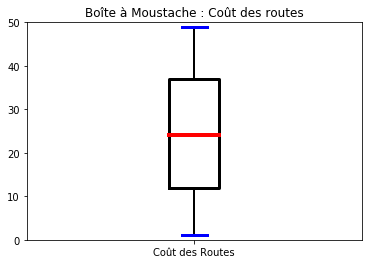

In [16]:
boxplotElements = plt.boxplot(sum_weight)
plt.title("Boîte à Moustache : Coût des routes")
plt.gca().xaxis.set_ticklabels(['Coût des Routes'])
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in boxplotElements['boxes']:
    element.set_linewidth(3)
for element in boxplotElements['whiskers']:
    element.set_linewidth(2)
for element in boxplotElements['caps']:
    element.set_color('blue')
    element.set_linewidth(3)
plt.ylim(minimumCoutRoute-1, maximumCoutRoute+1)
plt.savefig('BoxPlotCout.png')
plt.show()

### 5.1.2 Statistiques des demandes des clients <a class="anchor" id="stats_demandes"></a>

#### Récupération des données de commandes

In [17]:
with open('matrix.json') as f:
    data = json.load(f)
    
orders = [data[str(i+1)]["demande"] for i in range(len(data))]
    
orders = np.array(orders)


#### Moyenne du volume des demandes clients

In [18]:
sum_orders = [np.prod(i) for i in orders]
print(sum_orders)

print("Le volume moyen des demandes des clients est de %s" % (np.array(sum_orders).mean()))

[6, 12, 6, 9, 6, 2, 12, 6, 2, 6, 12, 4, 6, 3, 4, 4, 3, 3, 27, 9, 6, 6, 27, 6, 3, 9, 3, 18, 18, 27, 12, 6, 4, 6, 6, 9, 9, 3, 12, 9, 18, 2, 1, 4, 2, 9, 2, 2, 6, 6]
Le volume moyen des demandes des clients est de 7.86


#### Maximum et Minimum des demandes clients

In [19]:
maximumDemande = max(sum_orders)
print("La valeur maximale pour la demande des clients est : %s" % maximumDemande)
minimumDemande = min(sum_orders)
print("La valeur minimale pour la demande des clients est : %s" % minimumDemande)
etendueDemande = maximumDemande - minimumDemande
print("L'étendue de cette valeur est donc de %s" % etendueDemande)

La valeur maximale pour la demande des clients est : 27
La valeur minimale pour la demande des clients est : 1
L'étendue de cette valeur est donc de 26


#### Médiane des demandes clients

In [20]:
medianeCout = np.median(np.array(sum_orders))
print("La valeur médiane pour la demande des clients est : %s" % medianeCout)

La valeur médiane pour la demande des clients est : 6.0


#### Boite à Moustache des demandes clients

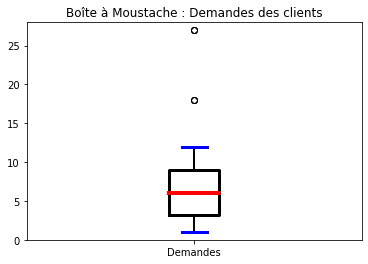

In [21]:
boxplotElements = plt.boxplot(sum_orders)
plt.title("Boîte à Moustache : Demandes des clients")
plt.gca().xaxis.set_ticklabels(['Demandes'])
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in boxplotElements['boxes']:
    element.set_linewidth(3)
for element in boxplotElements['whiskers']:
    element.set_linewidth(2)
for element in boxplotElements['caps']:
    element.set_color('blue')
    element.set_linewidth(3)
plt.ylim(minimumDemande-1, maximumDemande+1)
plt.savefig('BoxPlotDemande.png')
plt.show()

### 5.2 Etude des paramètres <a class="anchor" id="etude_param"></a>

### 5.2.1 Paramètres de l'instance du problème <a class="anchor" id="param_instance"></a>

Voici l'ensemble des paramètres que nous pouvons faire varier pour modifier l'instance du problème : 

* Le nombre de camions :

Plus nous disposons de camions, mieux les tournées pourront être réparties. La somme totale des durées de tournée pour chaque camion sera donc réduite, ainsi l'heure de retour du dernier camion sera par conséquent minimisée.

* Le nombre de villes : 

Plus nous aurons de villes, plus la sommme des demandes client augmentera, ce qui engendrera indirectement une hausse du nombre de tournée à effectuer.

* La capacité des véhicules :

Plus la capacité des camions sera importante, plus elevé sera le nombre de clients desservis. De ce fait la taille des tournées sera allongée, ainsi leur nombre sera minimisé.

### 5.2.2 Paramètres de l'algorithme <a class="anchor" id="param_algo"></a>

Analysons à présent les différents paramètres agissant sur les performances de l'algorithme :

* Le nombre de fourmis : 

Plus le nombre de fourmis est grand, plus il y a de phéromones déposées à chaque itération et le nombre de chemins différents empruntés augmentera. 

* Le nombre d'itération : 

Il devra toujours être supérieur au nombre de fourmis, pour que les résultats aient le temps de converger vers la solution la plus proche de l'optimal.
Plus le nombre d'itération est grand, plus la somme des coûts minimale trouvée sera proche de la solution otpimale.

* Le taux de d'évaporation des phéromones :

Il aura un impact sur l'ensemble des phéromones, c'est-à-dire qu'à chaque itération le taux de phéromone diminuera plus ou moins fortement en fonction de la valeur de ce taux.
Ce mécanisme permet d'oublier lentement ce qui s'est passé précédemment et permet donc de diriger la recherche vers de nouvelles directions, sans être trop contraint par les précédents choix.

* Les constantes alpha et beta : 

Ces constantes vont décrire l'importance de la visibilité (beta) et des phéromones (alpha) dans le choix d'une route.

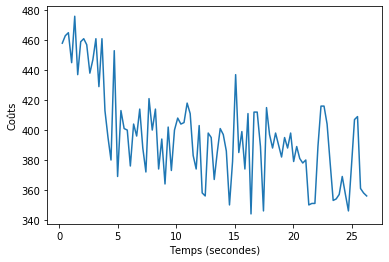

In [22]:
with open("data_conv.json") as f:
        data = json.load(f)
        
x = [i["Temps"] for i in data.values()]
y = [i["Cout"] for i in data.values()]

plt.xlabel("Temps (secondes)")
plt.ylabel("Coûts")

plt.plot(x, y)

plt.savefig('CourbeConvergence.png')

plt.show() # affiche la figure à l'écran

## 6. Analyse des résultats <a class="anchor" id="analyse_result"></a>

### 6.1. Performance de l'algorithme <a class="anchor" id="perform_algo"></a>

Suite à de nombreux tests, nous nous sommes rendus compte de l'importance de chacun des paramètres. 

Voici trois courbes représentant l'évolution du temps de traitement de l'algorithme en modifiant les paramètres suivants, indépendemment des autres : nombre de villes (10,20,30,40,50), nombre de fourmis (20,40,60,80,100) et nombre d'itérations (100,200,300,400,500) :

![title](img/nbVille.png)
![title](img/nbFourmi.png)
![title](img/nbIteration.png)

D'après ces courbes, nous constatons que l'augmentation du nombre de fourmis ou du nombre d'itérations fait augmenter le temps d'execution de manière linéaire. Cependant concernant l'augmentation du nombre de villes, celle-ci fait augmenter notre temps d'execution de manière quadratique.

### 6.2. Temps de convergence / nombre d'itérations <a class="anchor" id="temps_convergence"></a>

Nous avons réalisés tests avec des paramètres différents. Voici les courbes de convergences obtenues : 

![title](img/convergence1.png)
![title](img/convergence2.png)
![title](img/convergence3.png)
    
Comme nous l'avions supposé lors du choix de l'algorithme, nous pouvons constater une convergence rapide pour chacun de ces tests. En effet, on observe une courbe dont l'allure diminue abruptement, pour rapidement se stabiliser par la suite.
On peut en conclure qu'il nous faudra qu'un petit nombre d'itération pour avoir une solution s'approchant de la solution optimale, néanmoins il est possible que l'on trouve une valeur plus optimale encore, mais le nombre d'itération pour l'intteindre peut rapidement devenir très grand. 

## 7. Limites <a class="anchor" id="limites"></a>

* Le langage python avec cet algorithme connait certaine limite. En effet, ce langage ne permet pas d'avoir des valeurs inférieurs à $10^{-308}$, donc le taux d'évaporation ne peut pas être trop grand si on a un trop grand nombre d'itération. Dans ce cas, le taux de phéromone risque d'être trop faible et de prendre un type NaN.

* La puissance de nos ordinateurs, qui peuvent uniquement permettre de réaliser des tests avec des paramètres plutôt faible. Un serveur serait plus adapté pour faire des calculs de cet envergure. 

* Pour finir, la solution que notre algorithme fournie, n'est qu'une solution approchée de la solution optimale. 

## 8. Conclusion <a class="anchor" id="conclusion"></a>

Pour conclure nous avons apportés une solution pertinente à ce problème, même si cette solution n'est pas la plus optimale, elle s'en approche et permet à l'entreprise de recréer ses tournées.
Concernant des instances contenant plusieurs milliers de villes, il faudra quelques heures pour pouvoir fournir une solution. Ces quelques heures sont bien évidemment négligeables face aux siècles nécessaire à la résolution exacte de ce problème.

Ceci a été résilable grâce au travail que nous avons fourni aussi bien en période d’apprentissage qu’en période de projet. Le groupe avait une très bonne dynamique globale, et répartition des tâches équitables. Le fait de pouvoir s’occuper d’une partie sans se soucier de la qualité du travail des autres membres du groupe, est d’une importance capitale. Ce projet nous a apporté beaucoup, surtout dans la rigueur du travail, et de ne pas foncer la tête baissée, mais au contraire suivre les différentes étapes, qui dans notre cas étaient respectivement : analyse, choix et étude, implémentation et pour finir par la rédaction.